In [1]:
from process_image import Parameters
from feature_matching import *
from post_processing import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [355]:
imagefile = "r30_s1200mask.png"
img_brg = cv2.imread(imagefile)
img_rgb = img_brg[...,::-1]

# set_parameters
para = Parameters(img_rgb) 
para.plotimg = 0

In [356]:
p1, p2 = feature_matching(imagefile, para)


found 13281 features

no keypoints are detected in 3th octave

Found 166 matches.

after remove the isoloated matching, found 159 matches



In [357]:
para.p1, para.p2 = p1.copy(),p2.copy()

In [358]:
# Change in mymodule
from imp import reload
import post_processing
# Change in mymodule
reload(post_processing)

<module 'post_processing' from '/media/phillipe/SCIINT/WORKING-PLACE/paper-forgery-lib/translate_algorithms/FE-CMFD-HFPM/python/post_processing.py'>

In [359]:
para.check_orienation = False
ret = post_processing.post_processing(img_rgb, para)

Tampering detected!




In [360]:
map = ret[1]
final_map = post_processing.generated_object_match_map(map, p1, p2)

In [361]:
vis_image = img_brg.copy()
for p_index in range(p1.shape[1]):
    point1 = (int(p1[0,p_index]), int(p1[1,p_index]))
    point2 = (int(p2[0,p_index]), int(p2[1,p_index]))
    
    vis_image = cv2.line(img=vis_image , pt1=point1 , pt2=point2, color=(0,255,0), thickness=2)
    
vis_image = vis_image[...,::-1]

(-0.5, 2013.5, 3038.5, -0.5)

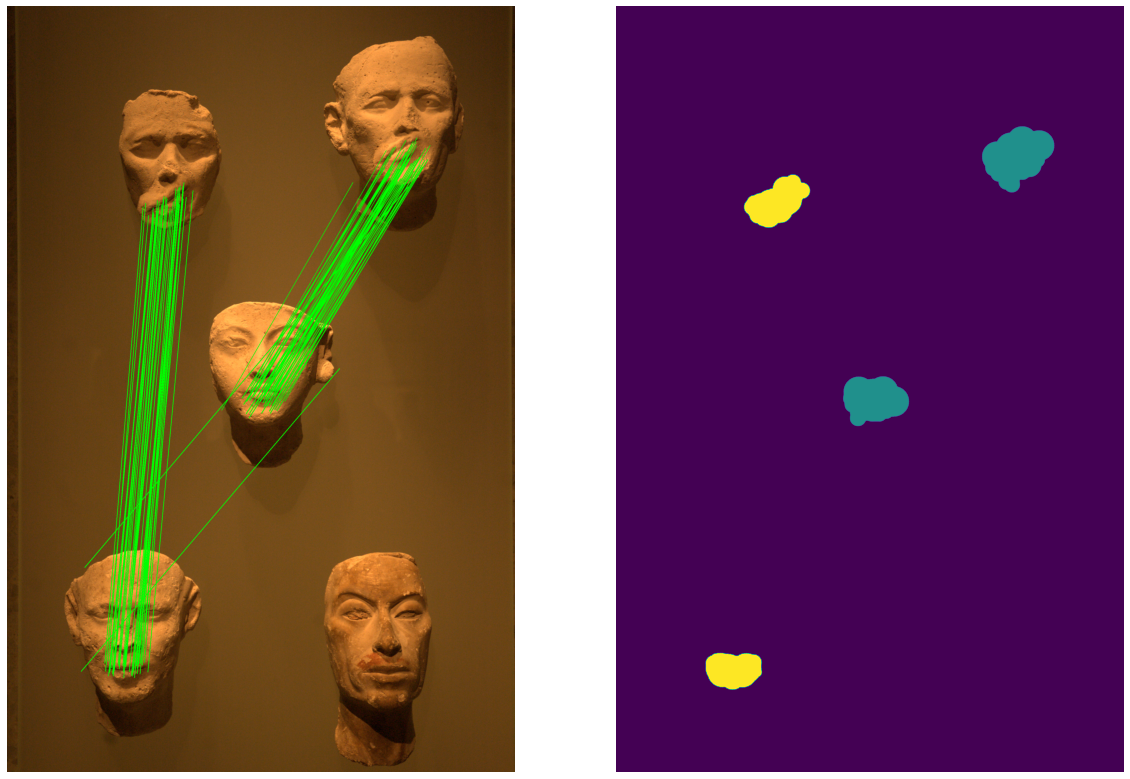

In [362]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1); plt.imshow(vis_image); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(final_map); plt.axis("off")
